In [20]:
from pathlib import Path
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
from matplotlib.collections import EllipseCollection
from matplotlib.colors import Normalize
import seaborn as sns
import matplotlib.pylab as plt
get_ipython().run_line_magic('matplotlib', 'inline')
from scipy import stats
from sklearn.utils import resample
from scipy.stats import t
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
from statsmodels.graphics.gofplots import ProbPlot
import warnings
warnings.filterwarnings("ignore")

## Importing Dataset

In [21]:
path = './Electric_Vehicle_Population_Data.csv'

In [22]:
ev = pd.read_csv(path)
ev

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150477,WBY43AW05P,Grays Harbor,Montesano,WA,98563.0,2023,BMW,I4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,19.0,251204075,POINT (-123.60535 46.982215),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF G...,5.302700e+10
150478,5YJ3E1EB7P,King,Seattle,WA,98104.0,2023,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,43.0,241344414,POINT (-122.329075 47.6018),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
150479,5YJYGDEEXM,King,Seattle,WA,98109.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,43.0,180705626,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
150480,5UXTA6C08P,Snohomish,Mountlake Terrace,WA,98043.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,1.0,240473950,POINT (-122.30842 47.78416),PUGET SOUND ENERGY INC,5.306105e+10


In [23]:
ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150482 entries, 0 to 150481
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         150482 non-null  object 
 1   County                                             150479 non-null  object 
 2   City                                               150479 non-null  object 
 3   State                                              150482 non-null  object 
 4   Postal Code                                        150479 non-null  float64
 5   Model Year                                         150482 non-null  int64  
 6   Make                                               150482 non-null  object 
 7   Model                                              150482 non-null  object 
 8   Electric Vehicle Type                              150482 non-null  object

## Data preprocessing

### Dropping the unnecessary columns

In [24]:
# Replace 'column_to_drop1', 'column_to_drop2', etc., with the actual column names you want to drop
columns_to_drop = ['Vehicle Location', 'DOL Vehicle ID', 'Postal Code', '2020 Census Tract', 'VIN (1-10)', 'Legislative District', 'Vehicle Location', 'State','Base MSRP']

# Drop the specified columns
ev = ev.drop(columns=columns_to_drop)

# Now 'df' contains the DataFrame with the specified columns dropped
ev

,County,City,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Electric Utility
0,King,Seattle,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
1,King,Bothell,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
2,Yakima,Yakima,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,PACIFICORP
3,King,Kirkland,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
4,Thurston,Olympia,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,PUGET SOUND ENERGY INC
...,...,...,...,...,...,...,...,...,...
150477,Grays Harbor,Montesano,2023,BMW,I4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF G...
150478,King,Seattle,2023,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
150479,King,Seattle,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
150480,Snohomish,Mountlake Terrace,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,PUGET SOUND ENERGY INC


In [25]:
ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150482 entries, 0 to 150481
Data columns (total 9 columns):
 #   Column                                             Non-Null Count   Dtype 
---  ------                                             --------------   ----- 
 0   County                                             150479 non-null  object
 1   City                                               150479 non-null  object
 2   Model Year                                         150482 non-null  int64 
 3   Make                                               150482 non-null  object
 4   Model                                              150482 non-null  object
 5   Electric Vehicle Type                              150482 non-null  object
 6   Clean Alternative Fuel Vehicle (CAFV) Eligibility  150482 non-null  object
 7   Electric Range                                     150482 non-null  int64 
 8   Electric Utility                                   150479 non-null  object
dtypes: in

### Renaming the columns for regression

In [26]:
# Rename the column
ev = ev.rename(columns={'Electric Vehicle Type': 'Electric_Vehicle_Type'})
ev = ev.rename(columns={'Clean Alternative Fuel Vehicle (CAFV) Eligibility': 'Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility'})
ev = ev.rename(columns={'Electric Range': 'Electric_Range'})
ev

,County,City,Model Year,Make,Model,Electric_Vehicle_Type,Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility,Electric_Range,Electric Utility
0,King,Seattle,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
1,King,Bothell,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
2,Yakima,Yakima,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,PACIFICORP
3,King,Kirkland,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
4,Thurston,Olympia,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,PUGET SOUND ENERGY INC
...,...,...,...,...,...,...,...,...,...
150477,Grays Harbor,Montesano,2023,BMW,I4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF G...
150478,King,Seattle,2023,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
150479,King,Seattle,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
150480,Snohomish,Mountlake Terrace,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,PUGET SOUND ENERGY INC


### Encoding the Categorical String Variables

In [27]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame
label_encoder = LabelEncoder()
ev['CAFV_encoded'] = label_encoder.fit_transform(ev['Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility'])
ev['Type_encoded'] = label_encoder.fit_transform(ev['Electric_Vehicle_Type'])
ev['Model_encoded'] = label_encoder.fit_transform(ev['Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility'])
ev['Make_encoded'] = label_encoder.fit_transform(ev['Electric_Vehicle_Type'])
ev

,County,City,Model Year,Make,Model,Electric_Vehicle_Type,Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility,Electric_Range,Electric Utility,CAFV_encoded,Type_encoded,Model_encoded,Make_encoded
0,King,Seattle,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),0,0,0,0
1,King,Bothell,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),2,1,2,1
2,Yakima,Yakima,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,PACIFICORP,2,1,2,1
3,King,Kirkland,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),0,0,0,0
4,Thurston,Olympia,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,PUGET SOUND ENERGY INC,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150477,Grays Harbor,Montesano,2023,BMW,I4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF G...,1,0,1,0
150478,King,Seattle,2023,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),1,0,1,0
150479,King,Seattle,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),1,0,1,0
150480,Snohomish,Mountlake Terrace,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,PUGET SOUND ENERGY INC,0,1,0,1


### Removing vehicles prior to 2010

In [28]:
ev = ev[ev['Model Year']>=2010]
ev 

,County,City,Model Year,Make,Model,Electric_Vehicle_Type,Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility,Electric_Range,Electric Utility,CAFV_encoded,Type_encoded,Model_encoded,Make_encoded
0,King,Seattle,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),0,0,0,0
1,King,Bothell,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),2,1,2,1
2,Yakima,Yakima,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,PACIFICORP,2,1,2,1
3,King,Kirkland,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),0,0,0,0
4,Thurston,Olympia,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,PUGET SOUND ENERGY INC,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150477,Grays Harbor,Montesano,2023,BMW,I4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF G...,1,0,1,0
150478,King,Seattle,2023,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),1,0,1,0
150479,King,Seattle,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),1,0,1,0
150480,Snohomish,Mountlake Terrace,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,PUGET SOUND ENERGY INC,0,1,0,1


### Introducing Dummy variables on 'Model Year'

In [29]:
what=pd.get_dummies(ev['Model Year'], prefix='y')
ev = ev.merge(what, how='inner', left_index=True, right_index=True)
ev

,County,City,Model Year,Make,Model,Electric_Vehicle_Type,Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility,Electric_Range,Electric Utility,CAFV_encoded,...,y_2015,y_2016,y_2017,y_2018,y_2019,y_2020,y_2021,y_2022,y_2023,y_2024
0,King,Seattle,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),0,...,0,0,0,0,0,1,0,0,0,0
1,King,Bothell,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),2,...,0,0,0,0,0,0,0,1,0,0
2,Yakima,Yakima,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,PACIFICORP,2,...,0,0,0,0,0,0,0,0,1,0
3,King,Kirkland,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),0,...,0,0,0,1,0,0,0,0,0,0
4,Thurston,Olympia,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,PUGET SOUND ENERGY INC,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150477,Grays Harbor,Montesano,2023,BMW,I4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF G...,1,...,0,0,0,0,0,0,0,0,1,0
150478,King,Seattle,2023,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),1,...,0,0,0,0,0,0,0,0,1,0
150479,King,Seattle,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),1,...,0,0,0,0,0,0,1,0,0,0
150480,Snohomish,Mountlake Terrace,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,PUGET SOUND ENERGY INC,0,...,0,0,0,0,0,0,0,0,1,0


In [30]:
what=pd.get_dummies(ev['CAFV_encoded'], prefix='CAFV')
ev = ev.merge(what, how='inner', left_index=True, right_index=True)
ev

,County,City,Model Year,Make,Model,Electric_Vehicle_Type,Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility,Electric_Range,Electric Utility,CAFV_encoded,...,y_2018,y_2019,y_2020,y_2021,y_2022,y_2023,y_2024,CAFV_0,CAFV_1,CAFV_2
0,King,Seattle,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),0,...,0,0,1,0,0,0,0,1,0,0
1,King,Bothell,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),2,...,0,0,0,0,1,0,0,0,0,1
2,Yakima,Yakima,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,PACIFICORP,2,...,0,0,0,0,0,1,0,0,0,1
3,King,Kirkland,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),0,...,1,0,0,0,0,0,0,1,0,0
4,Thurston,Olympia,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,PUGET SOUND ENERGY INC,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150477,Grays Harbor,Montesano,2023,BMW,I4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF G...,1,...,0,0,0,0,0,1,0,0,1,0
150478,King,Seattle,2023,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),1,...,0,0,0,0,0,1,0,0,1,0
150479,King,Seattle,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),1,...,0,0,0,1,0,0,0,0,1,0
150480,Snohomish,Mountlake Terrace,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,PUGET SOUND ENERGY INC,0,...,0,0,0,0,0,1,0,1,0,0


In [31]:
what=pd.get_dummies(ev['Type_encoded'], prefix='Type')
ev = ev.merge(what, how='inner', left_index=True, right_index=True)
ev

,County,City,Model Year,Make,Model,Electric_Vehicle_Type,Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility,Electric_Range,Electric Utility,CAFV_encoded,...,y_2020,y_2021,y_2022,y_2023,y_2024,CAFV_0,CAFV_1,CAFV_2,Type_0,Type_1
0,King,Seattle,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),0,...,1,0,0,0,0,1,0,0,1,0
1,King,Bothell,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),2,...,0,0,1,0,0,0,0,1,0,1
2,Yakima,Yakima,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,PACIFICORP,2,...,0,0,0,1,0,0,0,1,0,1
3,King,Kirkland,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),0,...,0,0,0,0,0,1,0,0,1,0
4,Thurston,Olympia,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,PUGET SOUND ENERGY INC,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150477,Grays Harbor,Montesano,2023,BMW,I4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF G...,1,...,0,0,0,1,0,0,1,0,1,0
150478,King,Seattle,2023,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),1,...,0,0,0,1,0,0,1,0,1,0
150479,King,Seattle,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),1,...,0,1,0,0,0,0,1,0,1,0
150480,Snohomish,Mountlake Terrace,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,PUGET SOUND ENERGY INC,0,...,0,0,0,1,0,1,0,0,0,1


## Data Visualisation

In [32]:
ev.describe()

,Model Year,Electric_Range,CAFV_encoded,Type_encoded,Model_encoded,Make_encoded,y_2010,y_2011,y_2012,y_2013,...,y_2020,y_2021,y_2022,y_2023,y_2024,CAFV_0,CAFV_1,CAFV_2,Type_0,Type_1
count,150446.000000,150446.000000,150446.000000,150446.000000,150446.000000,150446.000000,150446.000000,150446.000000,150446.000000,150446.000000,...,150446.000000,150446.000000,150446.000000,150446.000000,150446.000000,150446.000000,150446.000000,150446.000000,150446.000000,150446.000000
mean,2020.009226,67.858707,0.700344,0.223834,0.700344,0.223834,0.000160,0.005291,0.010854,0.030350,...,0.075070,0.124191,0.184777,0.246461,0.004267,0.418190,0.463276,0.118534,0.776166,0.223834
std,3.004906,96.226194,0.668531,0.416814,0.668531,0.416814,0.012629,0.072546,0.103618,0.171548,...,0.263505,0.329800,0.388118,0.430951,0.065185,0.493263,0.498651,0.323241,0.416814,0.416814
min,2010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,2021.000000,18.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2023.000000,97.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,2024.000000,337.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
ev['Electric_Range'].max()

337

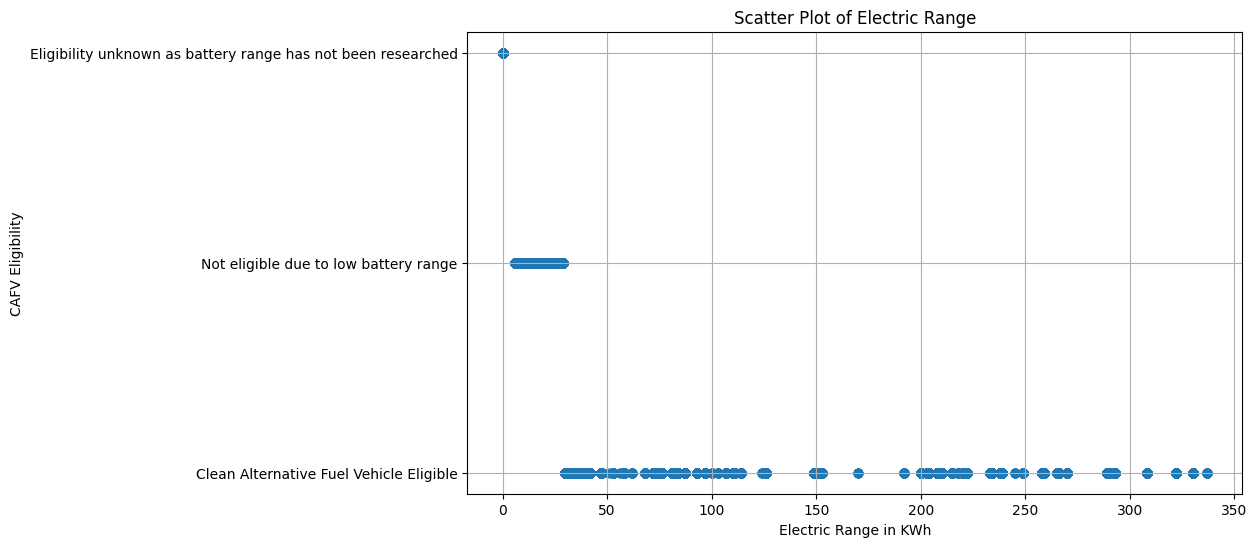

In [34]:
# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(ev['Electric_Range'], ev['Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility'], alpha=0.5)  # 'alpha' controls the transparency of the points
plt.title('Scatter Plot of Electric Range')
plt.xlabel('Electric Range in KWh')
plt.ylabel('CAFV Eligibility')  # Replace with a relevant label for the y-axis
plt.grid(True)
plt.show()


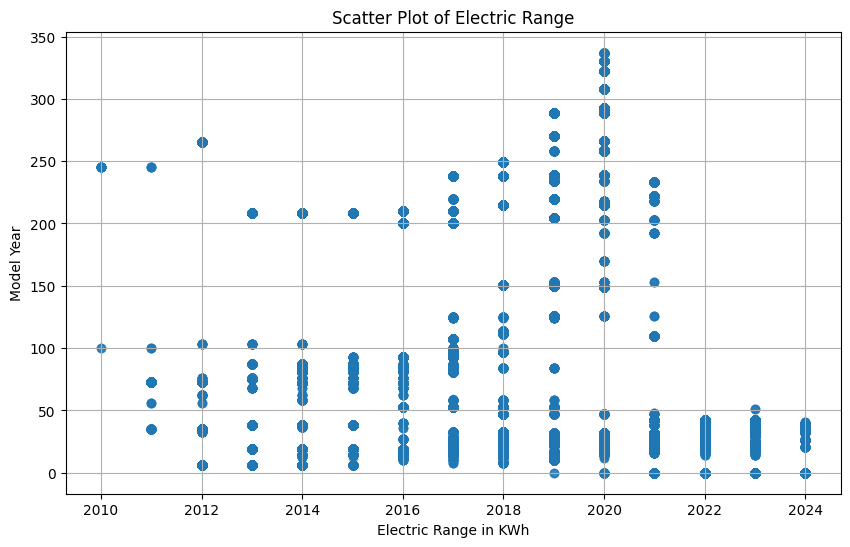

In [35]:
# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(ev['Model Year'],ev['Electric_Range'], alpha=0.5)  # 'alpha' controls the transparency of the points
plt.title('Scatter Plot of Electric Range')
plt.xlabel('Electric Range in KWh')
plt.ylabel('Model Year')  # Replace with a relevant label for the y-axis
plt.grid(True)
plt.show()


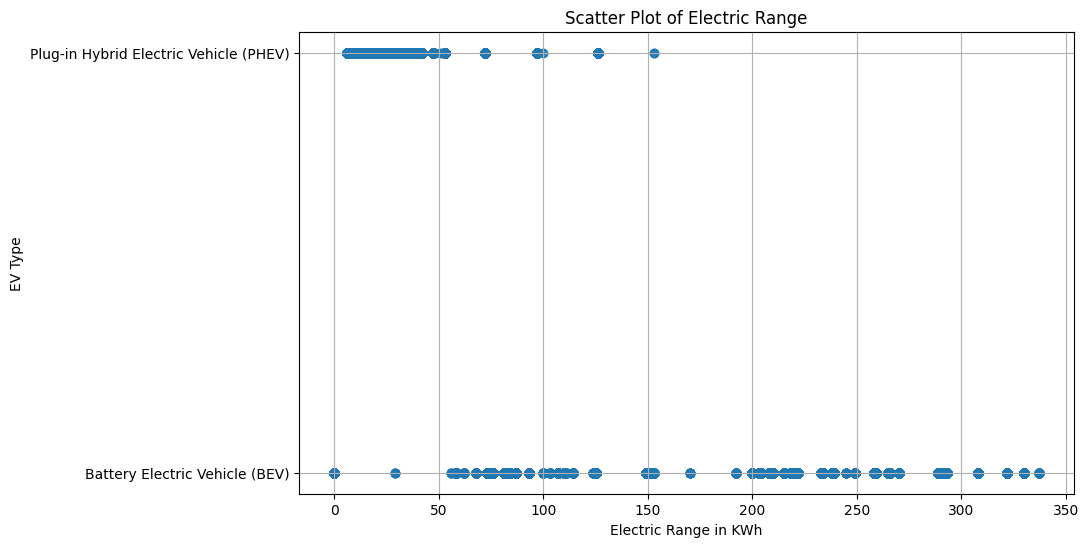

In [36]:
# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(ev['Electric_Range'], ev['Electric_Vehicle_Type'], alpha=0.5)  # 'alpha' controls the transparency of the points
plt.title('Scatter Plot of Electric Range')
plt.xlabel('Electric Range in KWh')
plt.ylabel('EV Type')  # Replace with a relevant label for the y-axis
plt.grid(True)
plt.show()


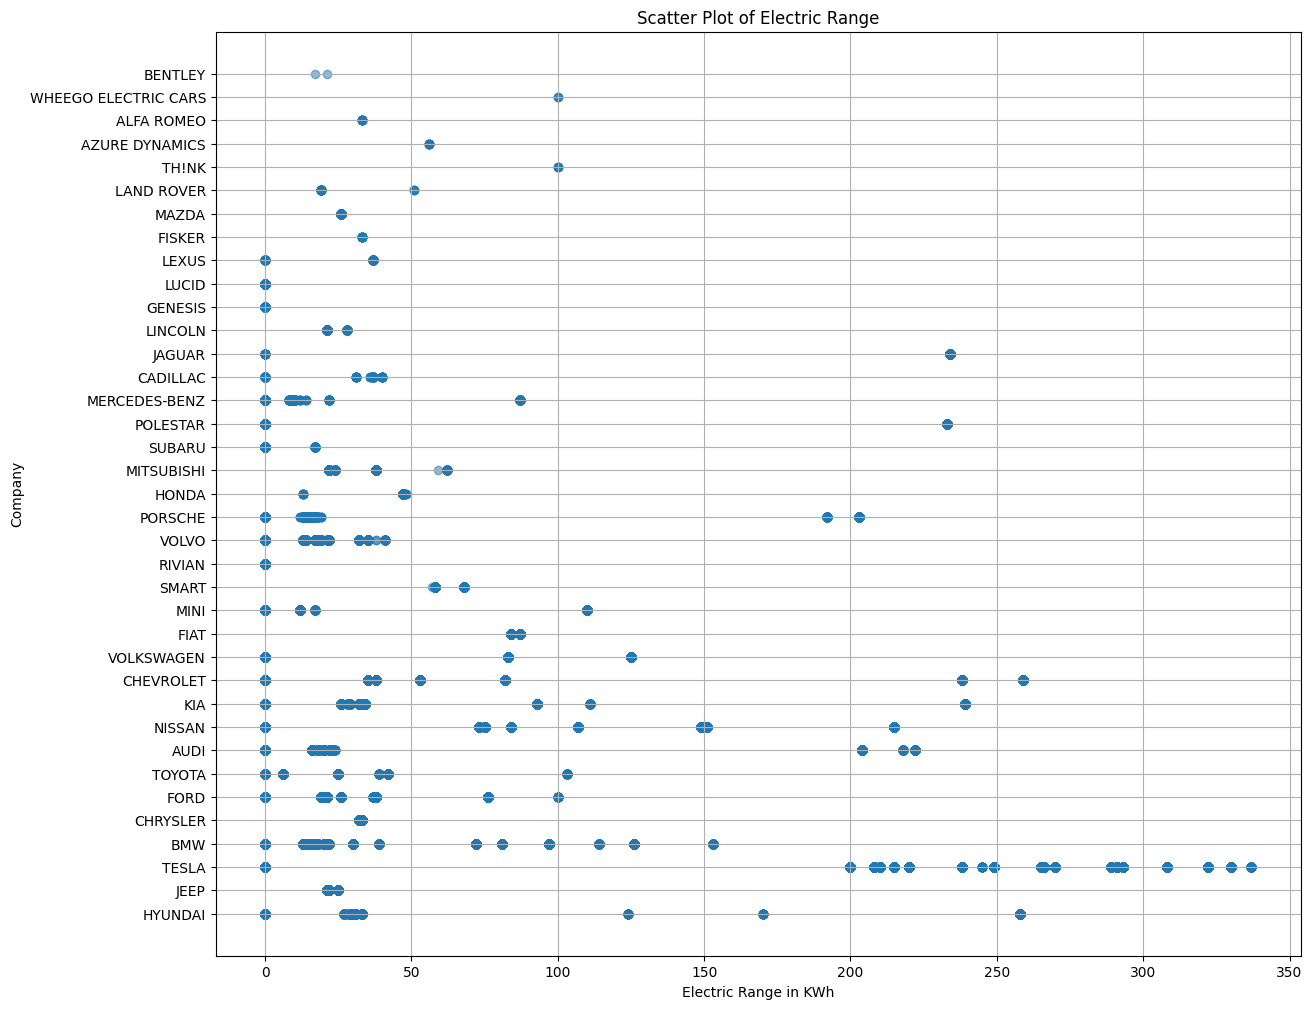

In [37]:
# Plotting the scatter plot
plt.figure(figsize=(14, 12))
plt.scatter(ev['Electric_Range'], ev['Make'], alpha=0.5)  # 'alpha' controls the transparency of the points
plt.title('Scatter Plot of Electric Range')
plt.xlabel('Electric Range in KWh')
plt.ylabel('Company')  # Replace with a relevant label for the y-axis
plt.grid(True)
plt.show()


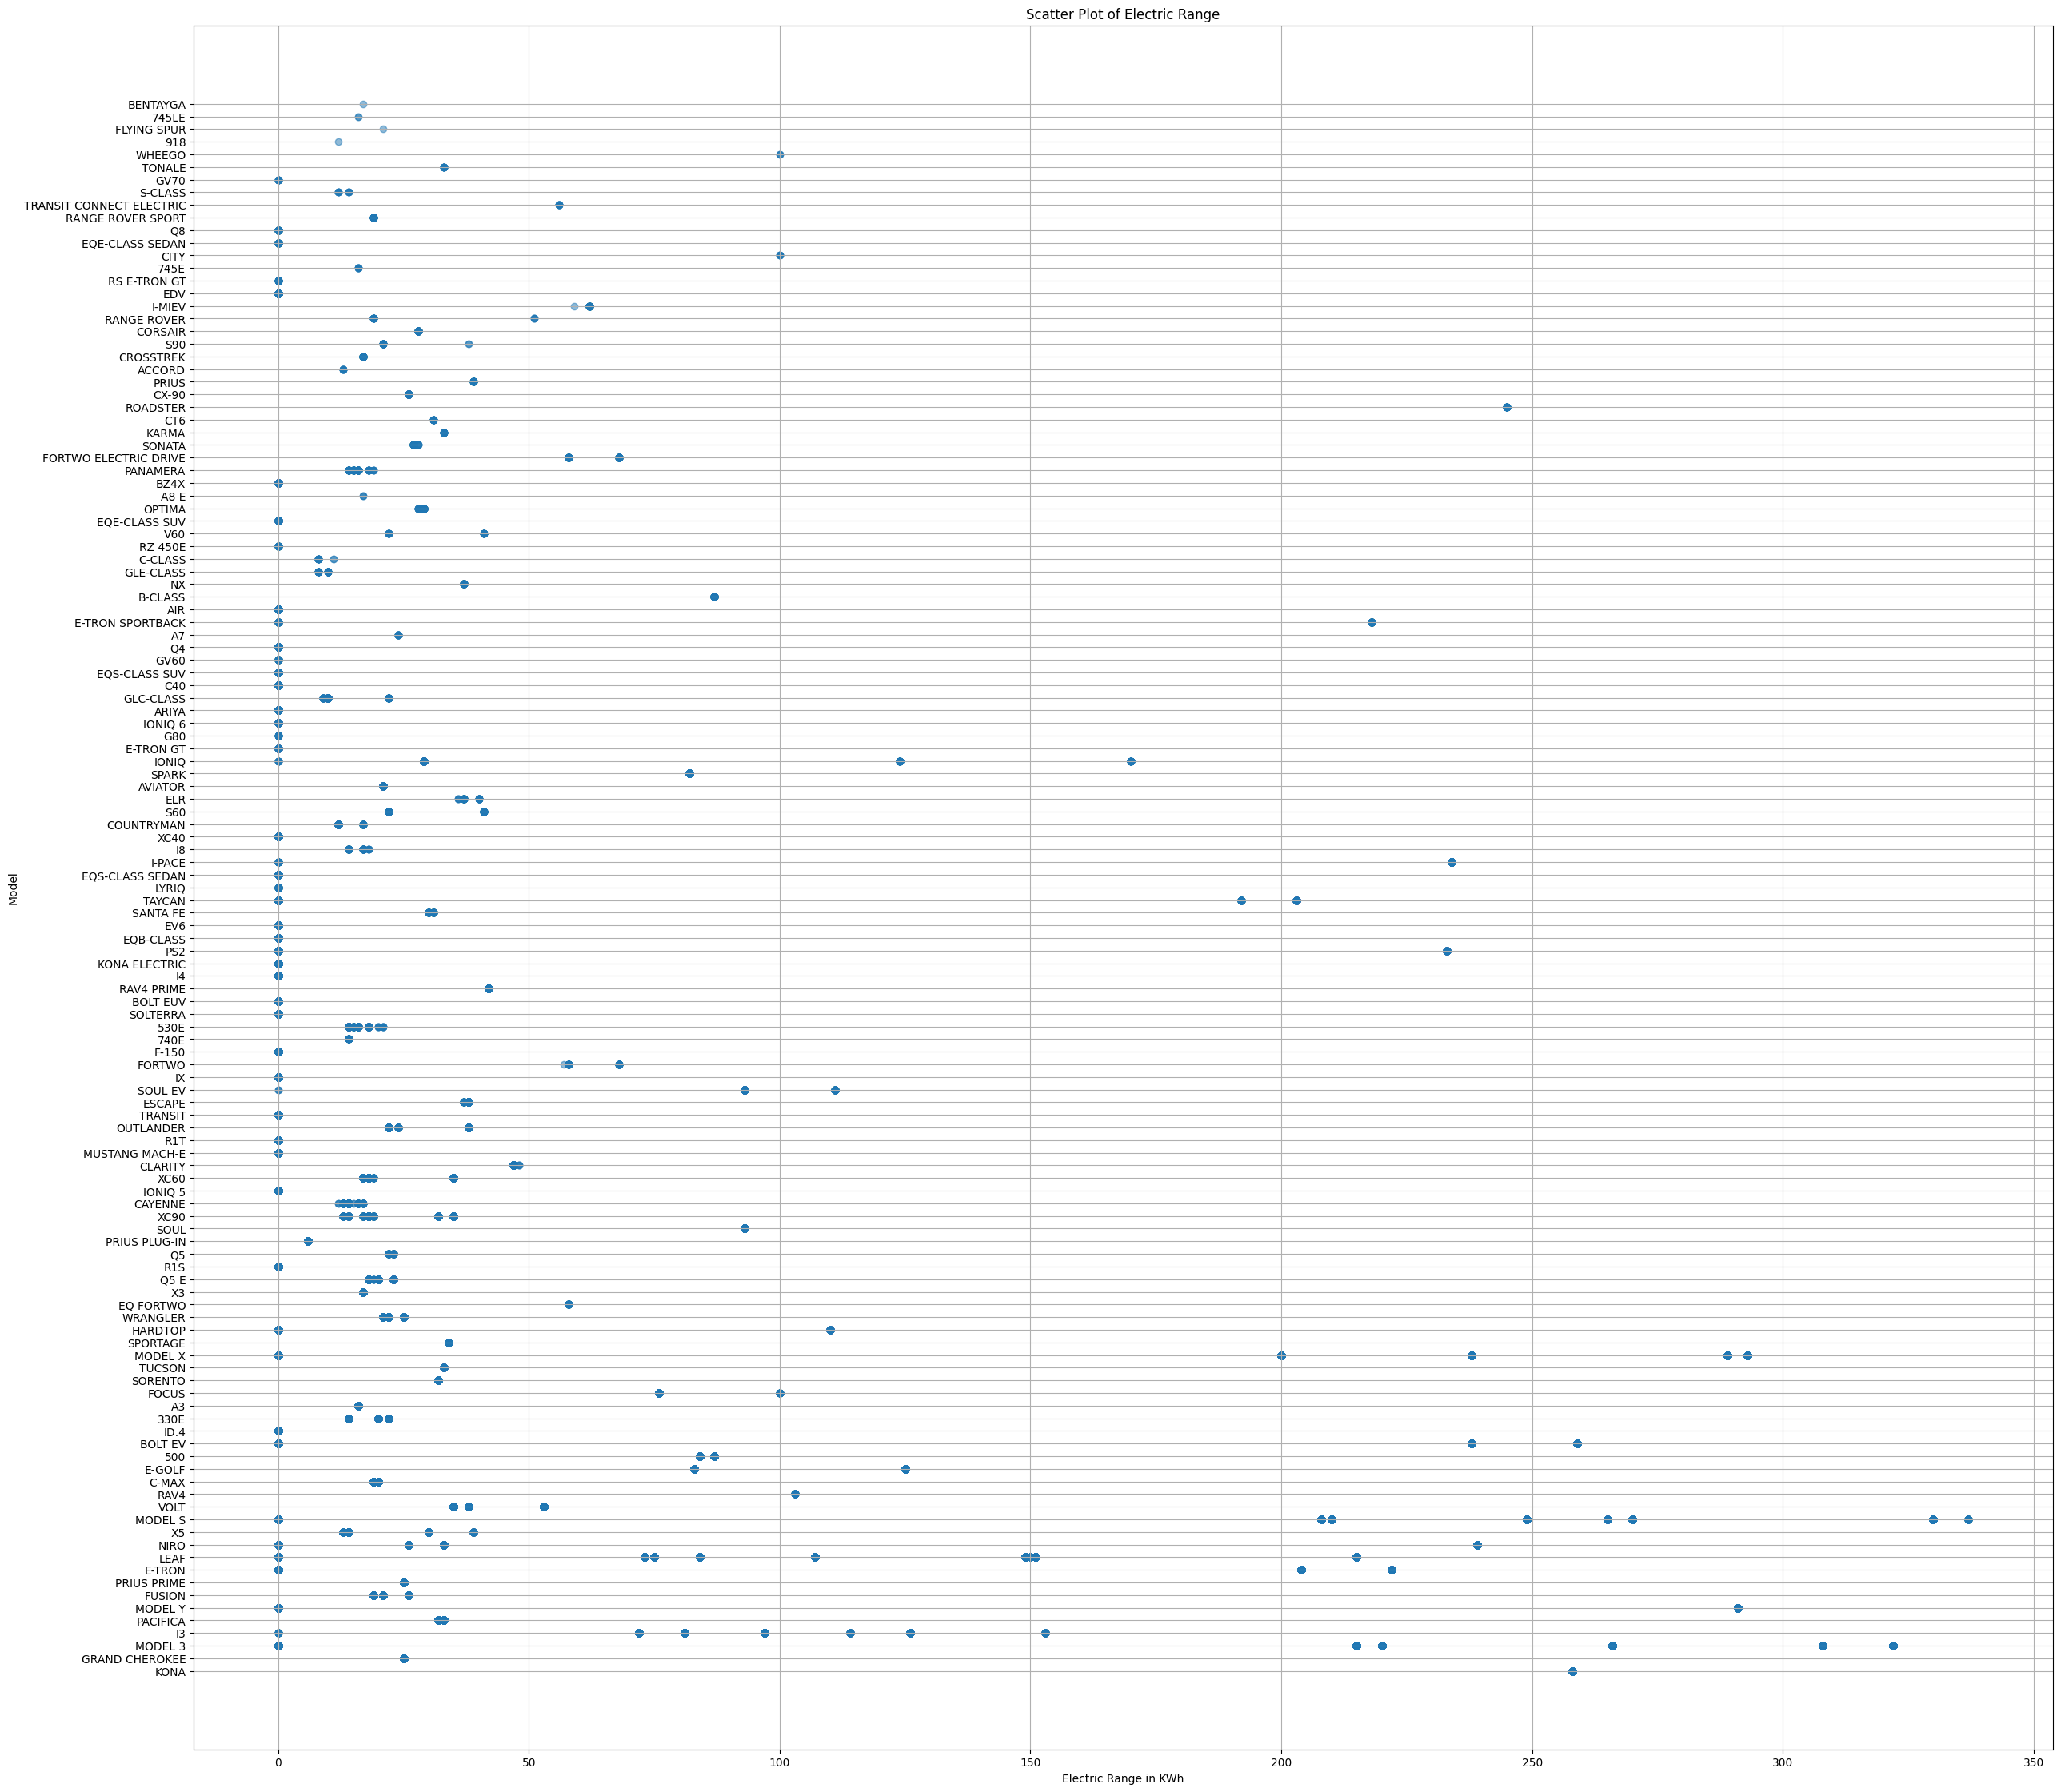

In [38]:
# Plotting the scatter plot
plt.figure(figsize=(30, 28))
plt.scatter(ev['Electric_Range'], ev['Model'], alpha=0.5)  # 'alpha' controls the transparency of the points
plt.title('Scatter Plot of Electric Range')
plt.xlabel('Electric Range in KWh')
plt.ylabel('Model')  # Replace with a relevant label for the y-axis
plt.grid(True)
plt.show()


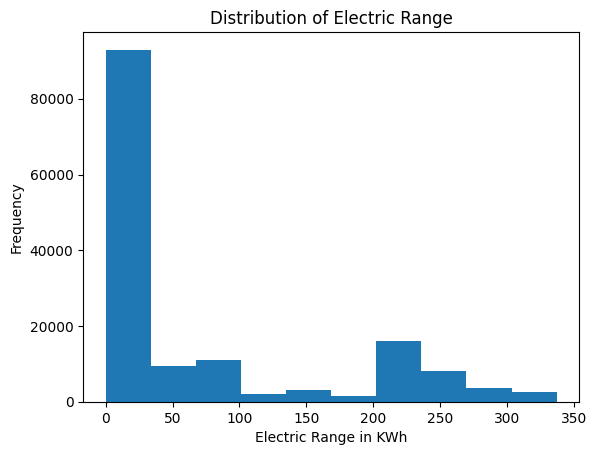

In [39]:
# Data distribution
import matplotlib.pyplot as plt

plt.hist(ev['Electric_Range'], bins=10)
plt.xlabel('Electric Range in KWh')
plt.ylabel('Frequency')
plt.title('Distribution of Electric Range')
plt.show()


Electric Range is measured in KWh

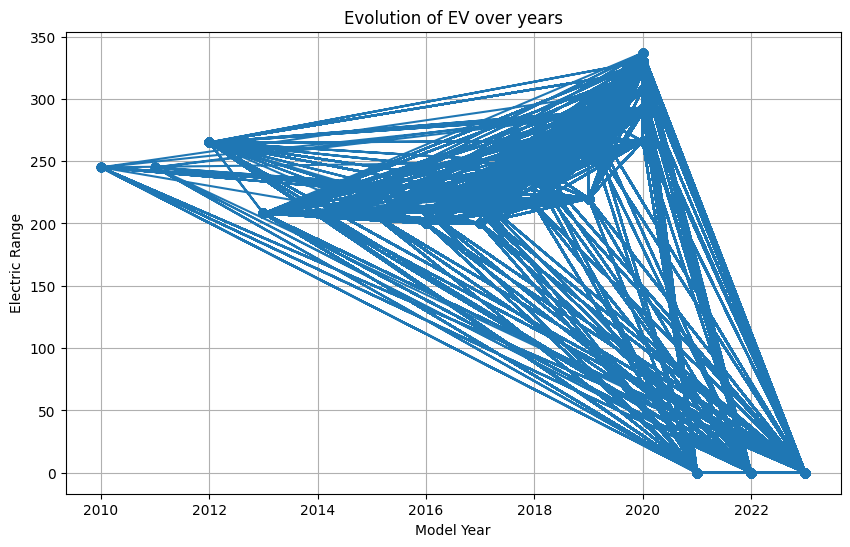

In [40]:
Tesla_ev = ev[ev['Make']=='TESLA']
plt.figure(figsize=(10, 6))
plt.plot(Tesla_ev['Model Year'], Tesla_ev['Electric_Range'], marker='o', linestyle='-')
plt.title('Evolution of EV over years')
plt.xlabel('Model Year')
plt.ylabel('Electric Range')
plt.grid(True)
plt.show()

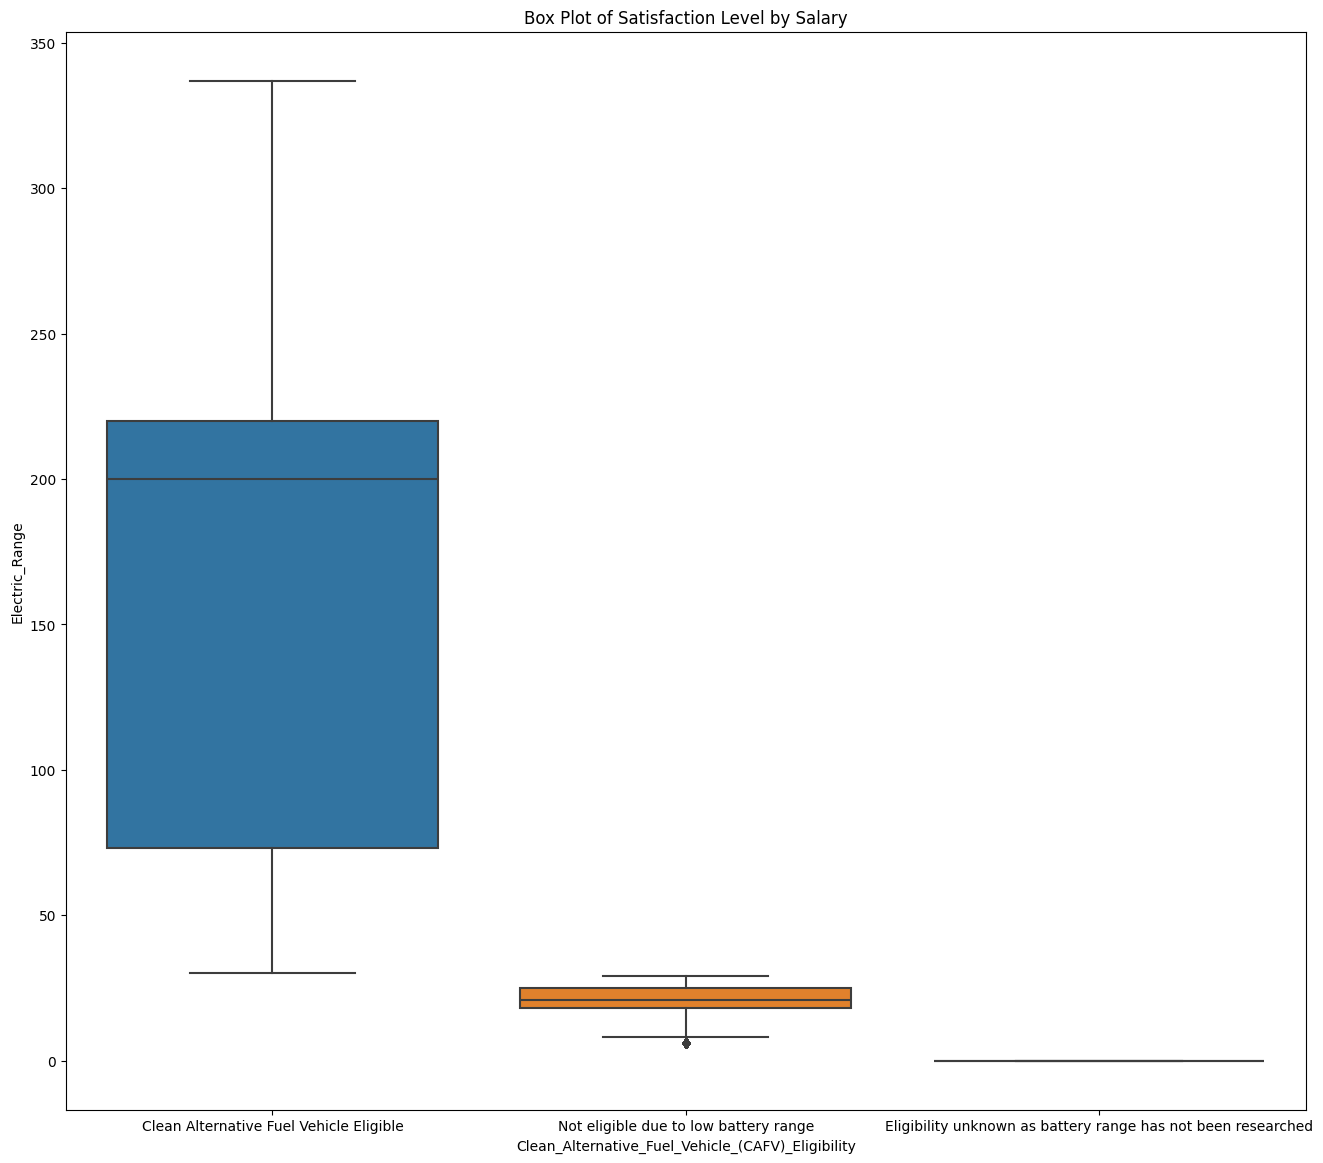

In [41]:
# Box Plot
plt.figure(figsize=(16,14))
sns.boxplot(x='Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility', y='Electric_Range', data=ev)
plt.title('Box Plot of Satisfaction Level by Salary')
plt.show()

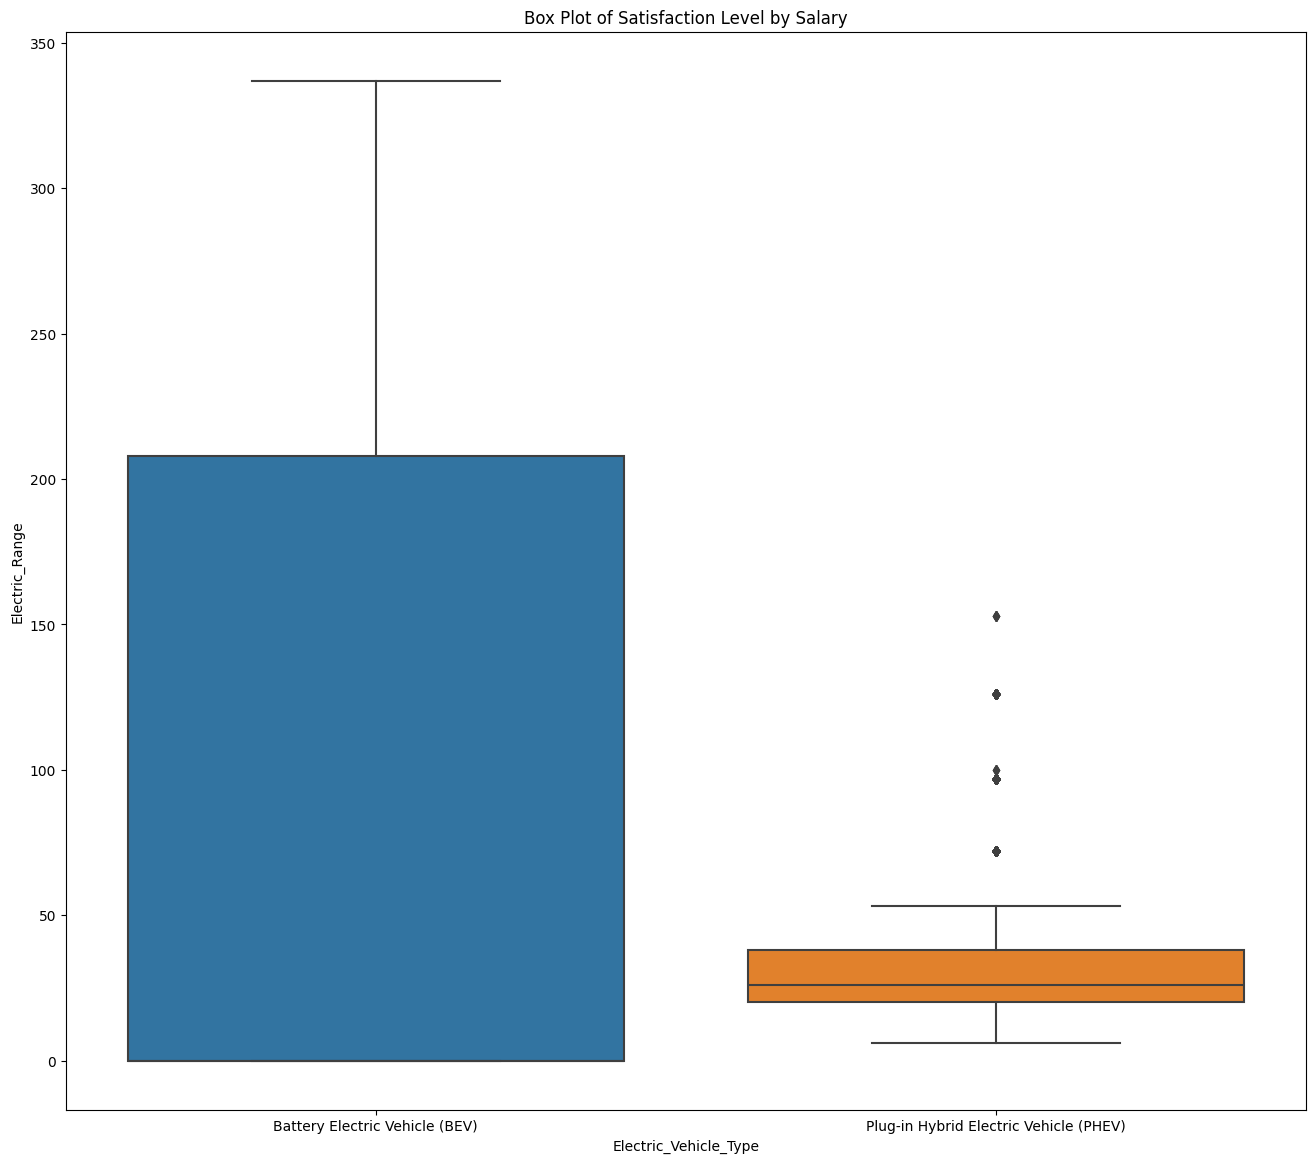

In [42]:
plt.figure(figsize=(16,14))
sns.boxplot(x='Electric_Vehicle_Type', y='Electric_Range', data=ev)
plt.title('Box Plot of Satisfaction Level by Salary')
plt.show()

In [43]:
import pandas as pd

# Assuming your DataFrame is named 'df'
# Extracting the relevant columns
columns_of_interest = ['CAFV_0','CAFV_1','CAFV_2', 'Type_0','Type_1', 'Electric_Range']

# Creating a new DataFrame with only the relevant columns
ev_selected = ev[columns_of_interest]

# Calculating the correlation matrix
correlation_matrix = ev_selected.corr()

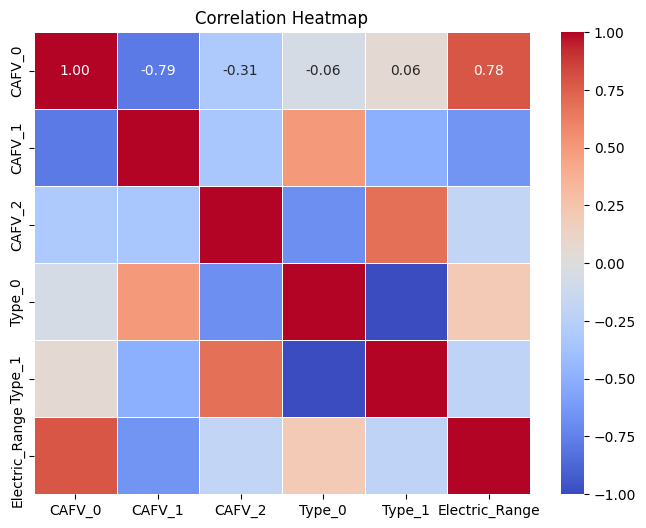

In [44]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

### There were no missing data in the dependent variable

In [45]:
ev.isnull().sum()

County                                               2
City                                                 2
Model Year                                           0
Make                                                 0
Model                                                0
Electric_Vehicle_Type                                0
Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility    0
Electric_Range                                       0
Electric Utility                                     2
CAFV_encoded                                         0
Type_encoded                                         0
Model_encoded                                        0
Make_encoded                                         0
y_2010                                               0
y_2011                                               0
y_2012                                               0
y_2013                                               0
y_2014                                               0
y_2015    

In [46]:
ev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150446 entries, 0 to 150481
Data columns (total 33 columns):
 #   Column                                             Non-Null Count   Dtype 
---  ------                                             --------------   ----- 
 0   County                                             150444 non-null  object
 1   City                                               150444 non-null  object
 2   Model Year                                         150446 non-null  int64 
 3   Make                                               150446 non-null  object
 4   Model                                              150446 non-null  object
 5   Electric_Vehicle_Type                              150446 non-null  object
 6   Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility  150446 non-null  object
 7   Electric_Range                                     150446 non-null  int64 
 8   Electric Utility                                   150444 non-null  object
 9   CAFV

## Analysis

### Performing linear regression using Ordinary Least Squares

In [29]:
model=smf.ols(formula='Electric_Range~CAFV_0+CAFV_1+CAFV_2',data=ev)
results1=model.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:         Electric_Range   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                 8.045e+04
Date:                Fri, 15 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:54:56   Log-Likelihood:            -8.2852e+05
No. Observations:              150446   AIC:                         1.657e+06
Df Residuals:                  150442   BIC:                         1.657e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.918e+11   7.28e+12     -0.054      0.9

In [30]:
model=smf.ols(formula='Electric_Range~Type_0+Type_1',data=ev)
results2=model.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:         Electric_Range   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     6777.
Date:                Fri, 15 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:55:17   Log-Likelihood:            -8.9720e+05
No. Observations:              150446   AIC:                         1.794e+06
Df Residuals:                  150444   BIC:                         1.794e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4143      0.194    187.628      0.0

In [66]:
model=smf.ols(formula='Electric_Range~CAFV_0+CAFV_1+CAFV_2+Type_0+Type_1',data=ev)
results3=model.fit()
print(results7.summary())

                            OLS Regression Results                            
Dep. Variable:         Electric_Range   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                 1.634e+05
Date:                Fri, 15 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:01:38   Log-Likelihood:            -7.7444e+05
No. Observations:              150446   AIC:                         1.549e+06
Df Residuals:                  150441   BIC:                         1.549e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.567e+11   3.42e+12     -0.075      0.9

In [67]:
model=smf.ols(formula='Electric_Range~CAFV_0+CAFV_1+CAFV_2+Type_0+Type_1+y_2010+y_2011+y_2012+y_2013+y_2014+y_2015+y_2016+y_2017+y_2018+y_2019+y_2020+y_2021+y_2022+y_2023+y_2024',data=ev)
results4=model.fit()
print(results8.summary())

                            OLS Regression Results                            
Dep. Variable:         Electric_Range   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 7.415e+04
Date:                Fri, 15 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:01:43   Log-Likelihood:            -7.2827e+05
No. Observations:              150446   AIC:                         1.457e+06
Df Residuals:                  150427   BIC:                         1.457e+06
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.251e+11   3.06e+12      0.270      0.7

### Plotting Residuals and probability distribution

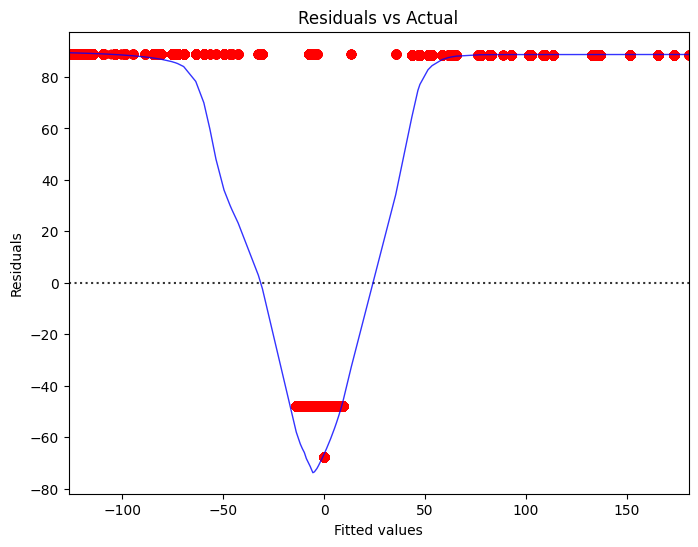

In [68]:
# model values
model_results = results1.fittedvalues
# model residuals
model_residuals = results1.resid
# normalized residuals
model_norm_residuals = results1.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = results1.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = results1.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure(figsize=[8,6])
plot_lm_1.axes[0] = sns.residplot(x=model_residuals, y=ev['Electric_Range'], data=ev,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'blue', 'lw': 1, 'alpha': 0.8},color='red')

plot_lm_1.axes[0].set_title('Residuals vs Actual')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');


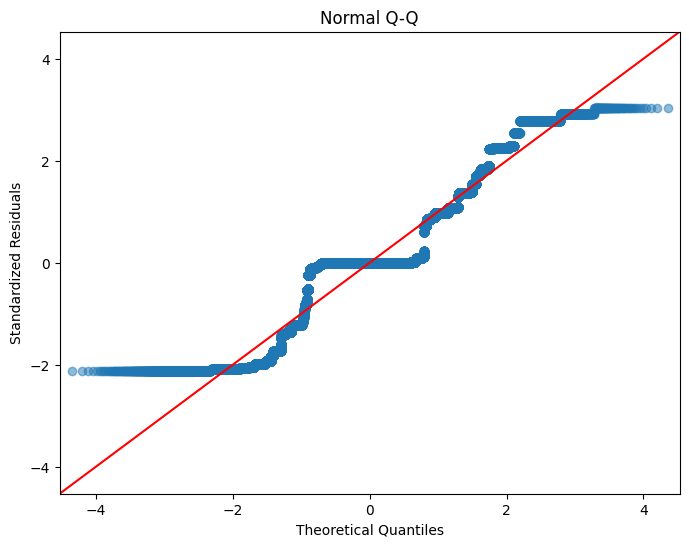

In [69]:
fig = plt.figure(figsize=(8, 6))
ax1 = plt.subplot(111)
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(ax=ax1,line='45', alpha=0.5, color='#4C72B0', lw=1)

ax1.set_title('Normal Q-Q')
ax1.set_xlabel('Theoretical Quantiles')
ax1.set_ylabel('Standardized Residuals')
plt.show()

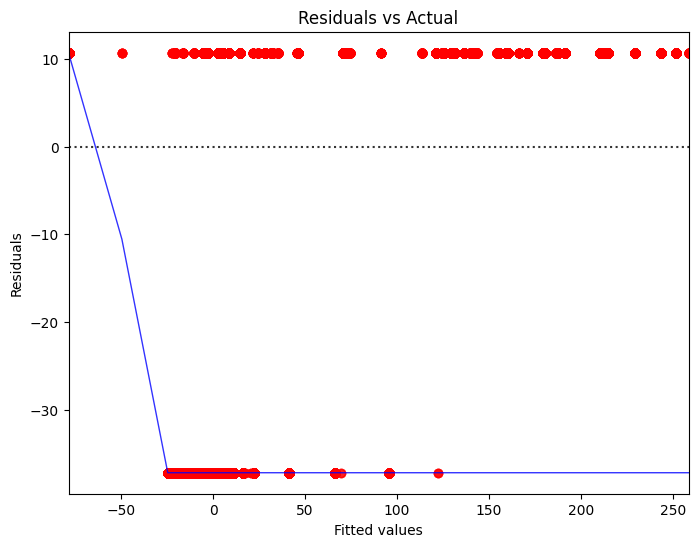

In [70]:
# model values
model_results = results2.fittedvalues
# model residuals
model_residuals = results2.resid
# normalized residuals
model_norm_residuals = results2.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = results2.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = results2.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure(figsize=[8,6])
plot_lm_1.axes[0] = sns.residplot(x=model_residuals, y=ev['Electric_Range'], data=ev,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'blue', 'lw': 1, 'alpha': 0.8},color='red')

plot_lm_1.axes[0].set_title('Residuals vs Actual')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

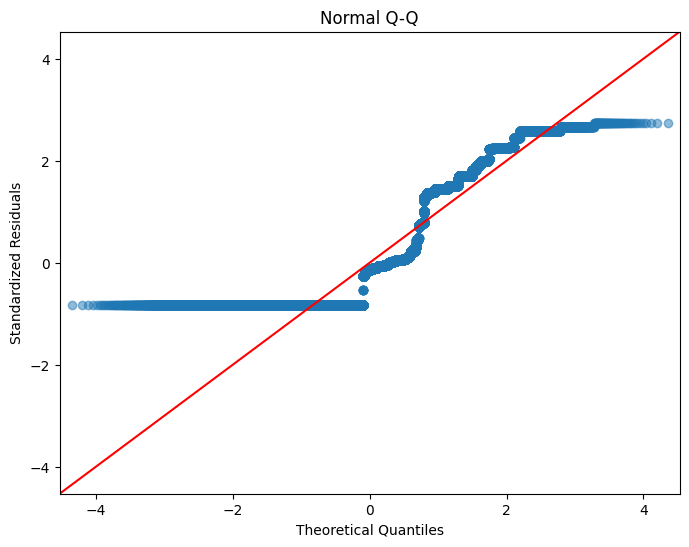

In [71]:
fig = plt.figure(figsize=(8, 6))
ax1 = plt.subplot(111)
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(ax=ax1,line='45', alpha=0.5, color='#4C72B0', lw=1)

ax1.set_title('Normal Q-Q')
ax1.set_xlabel('Theoretical Quantiles')
ax1.set_ylabel('Standardized Residuals')
plt.show()

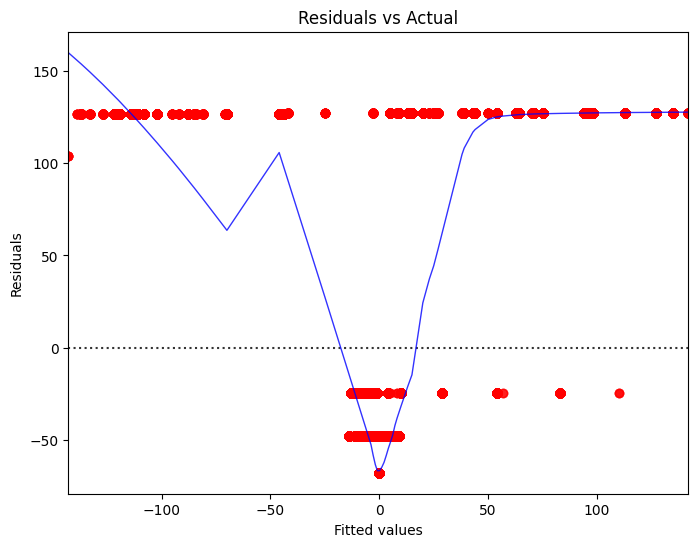

In [72]:
# model values
model_results = results3.fittedvalues
# model residuals
model_residuals = results3.resid
# normalized residuals
model_norm_residuals = results3.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = results3.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = results3.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure(figsize=[8,6])
plot_lm_1.axes[0] = sns.residplot(x=model_residuals, y=ev['Electric_Range'], data=ev,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'blue', 'lw': 1, 'alpha': 0.8},color='red')

plot_lm_1.axes[0].set_title('Residuals vs Actual')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

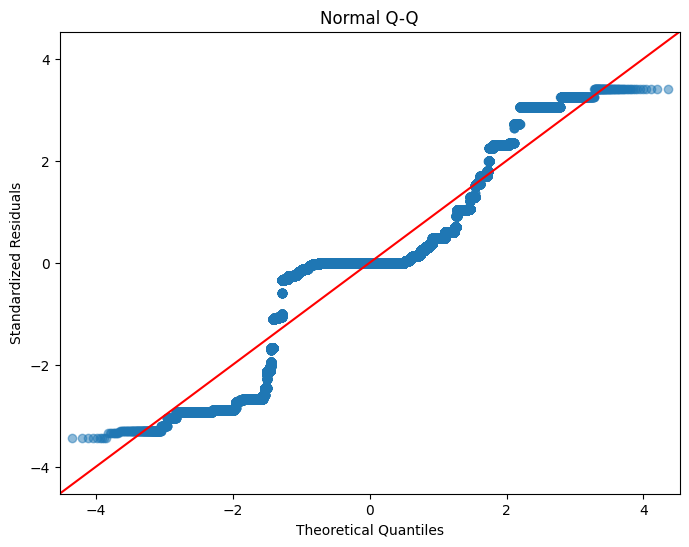

In [73]:
fig = plt.figure(figsize=(8, 6))
ax1 = plt.subplot(111)
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(ax=ax1,line='45', alpha=0.5, color='#4C72B0', lw=1)

ax1.set_title('Normal Q-Q')
ax1.set_xlabel('Theoretical Quantiles')
ax1.set_ylabel('Standardized Residuals')
plt.show()

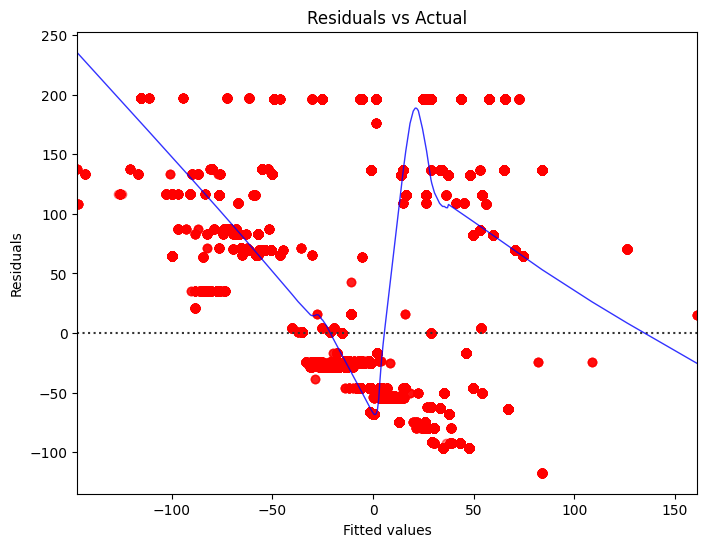

In [74]:
# model values
model_results = results4.fittedvalues
# model residuals
model_residuals = results4.resid
# normalized residuals
model_norm_residuals = results4.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = results4.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = results4.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure(figsize=[8,6])
plot_lm_1.axes[0] = sns.residplot(x=model_residuals, y=ev['Electric_Range'], data=ev,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'blue', 'lw': 1, 'alpha': 0.8},color='red')

plot_lm_1.axes[0].set_title('Residuals vs Actual')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

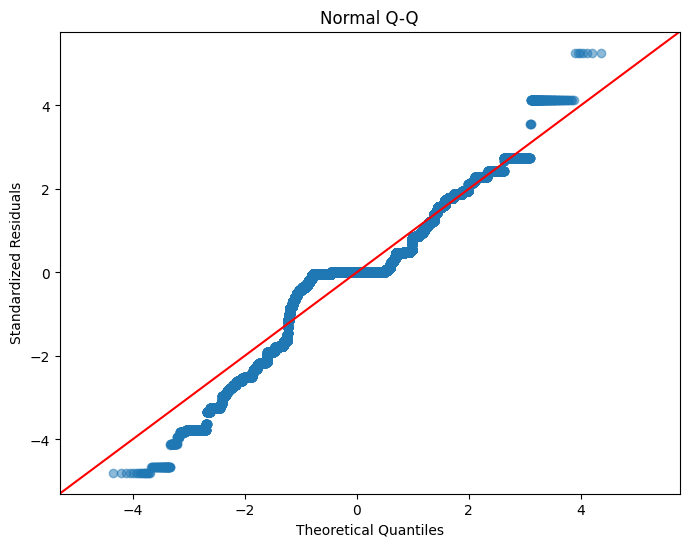

In [75]:
fig = plt.figure(figsize=(8, 6))
ax1 = plt.subplot(111)
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(ax=ax1,line='45', alpha=0.5, color='#4C72B0', lw=1)

ax1.set_title('Normal Q-Q')
ax1.set_xlabel('Theoretical Quantiles')
ax1.set_ylabel('Standardized Residuals')
plt.show()

### Performing Chi-Square analysis

In [77]:
# Creating a cross-tabulation of Gender and Salary
cross_tab = pd.crosstab(ev['CAFV_encoded'],ev['Electric_Range'])

In [52]:
# Performing the chi-squared test
chi2, p_value, _, _ = stats.chi2_contingency(cross_tab)

# Displaying the results
print("Chi-squared statistic:", chi2)
print("p-value:", p_value)

# Checking the significance level (commonly 0.05)
alpha = 0.05
if p_value < alpha:
    print("Since p-value<alpha,we reject the null hypothesis: There is a significant association between CAFV and Electric Range.")
else:
    print("Since p-value>alpha, we fail to reject the null hypothesis: There is no significant association between CAFV and Electric Range.")

Chi-squared statistic: 150358.15822091844
p-value: 0.0
Since p-value<alpha,we reject the null hypothesis: There is a significant association between CAFV and Electric Range.


In [53]:
# Creating a cross-tabulation of Gender and Salary
cross_tab = pd.crosstab(ev['Type_encoded'],ev['Electric_Range'])

In [56]:
# Performing the chi-squared test
chi2, p_value, _, _ = stats.chi2_contingency(cross_tab)

# Displaying the results
print("Chi-squared statistic:", chi2)
print("p-value:", p_value)

# Checking the significance level (commonly 0.05)
alpha = 0.05
if p_value < alpha:
    print("Since p-value<alpha,we reject the null hypothesis: There is a significant association between Vehicle Type and Electric Range.")
else:
    print("Since p-value>alpha, we fail to reject the null hypothesis: There is no significant association between Vehicle Type and Electric Range.")

Chi-squared statistic: 150358.15822091844
p-value: 0.0
Since p-value<alpha,we reject the null hypothesis: There is a significant association between Vehicle Type and Electric Range.


In [57]:
# Creating a cross-tabulation of Gender and Salary
cross_tab = pd.crosstab(ev['Model_encoded'],ev['Electric_Range'])

In [58]:
# Performing the chi-squared test
chi2, p_value, _, _ = stats.chi2_contingency(cross_tab)

# Displaying the results
print("Chi-squared statistic:", chi2)
print("p-value:", p_value)

# Checking the significance level (commonly 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant association between Vehicle Model and Electric Range.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between Vehicle Model and Electric Range.")

Chi-squared statistic: 300892.0
p-value: 0.0
Reject the null hypothesis: There is a significant association between Vehicle Model and Electric Range.


In [49]:
# Creating a cross-tabulation of Gender and Salary
cross_tab = pd.crosstab(ev['Make_encoded'],ev['Electric_Range'])

In [51]:
# Performing the chi-squared test
chi2, p_value, _, _ = stats.chi2_contingency(cross_tab)

# Displaying the results
print("Chi-squared statistic:", chi2)
print("p-value:", p_value)

# Checking the significance level (commonly 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant association between Make and Electric Range.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between Model and Electric Range.")

Chi-squared statistic: 150358.15822091844
p-value: 0.0
Reject the null hypothesis: There is a significant association between Make and Electric Range.


In [103]:
# Creating a cross-tabulation of Gender and Salary
cross_tab = pd.crosstab(ev['Model Year'],ev['Electric_Range'])

In [104]:
# Performing the chi-squared test
chi2, p_value, _, _ = stats.chi2_contingency(cross_tab)

# Displaying the results
print("Chi-squared statistic:", chi2)
print("p-value:", p_value)

# Checking the significance level (commonly 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant association between Model Year and Electric Range.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between Model Year and Electric Range.")

Chi-squared statistic: 929112.5456679747
p-value: 0.0
Reject the null hypothesis: There is a significant association between Model Year and Electric Range.


In [61]:
# Creating a cross-tabulation of Gender and Salary
cross_tab = pd.crosstab(index=[ev['CAFV_encoded'],ev['Type_encoded'],ev['Model_encoded'],ev['Make_encoded'],ev['Model Year']],columns=ev['Electric_Range'])


In [62]:
# Performing the chi-squared test
chi2, p_value, _, _ = stats.chi2_contingency(cross_tab)

# Displaying the results
print("Chi-squared statistic:", chi2)
print("p-value:", p_value)

# Checking the significance level (commonly 0.05)
alpha = 0.05
if p_value < alpha:
    print("Since p-value<alpha,we reject the null hypothesis: There is a significant association between CAFV, Model, Type, Make and Year of vehicle and its Electric Range.")
else:
    print("Since p-value<alpha,we fail to reject the null hypothesis: There is no significant association between CAFV, Model, Type , Make and Year of vehicle and its Electric Range.")

Chi-squared statistic: 2378772.5363605344
p-value: 0.0
Since p-value<alpha,we reject the null hypothesis: There is a significant association between CAFV, Model, Type, Make and Year of vehicle and its Electric Range.


### Performing ANOVA test

#### One -Way ANOVA

In [64]:
CAFV_eligible = ev[ev['CAFV_encoded']==0]['Electric_Range']
CAFV_ineligible = ev[ev['CAFV_encoded']==2]['Electric_Range']
CAFV_unknown = ev[ev['CAFV_encoded']==1]['Electric_Range']

f_statistic, p_value = stats.f_oneway(CAFV_eligible, CAFV_ineligible, CAFV_unknown)

# Displaying the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)
# Checking the significance level (commonly 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The Electric Range varies signifiacntly according to the CAFV eligibility of a vehicle.")
else:
    print("Fail to reject the null hypothesis: The Electric Range doesn't variy signifiacntly according to the CAFV eligibility of a vehicle..")

F-statistic: 120675.095183961
p-value: 0.0
Reject the null hypothesis: The Electric Range varies signifiacntly according to the CAFV eligibility of a vehicle.


In [65]:
Type_BEV = ev[ev['Type_encoded']==0]['Electric_Range']
Type_PHEV = ev[ev['Type_encoded']==1]['Electric_Range']

f_statistic, p_value = stats.f_oneway(Type_BEV, Type_PHEV)

# Displaying the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)
# Checking the significance level (commonly 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The Electric Range varies signifiacntly according to the Type of a vehicle.")
else:
    print("Fail to reject the null hypothesis: The Electric Range doesn't vary signifiacntly according to the Type of a vehicle.")

F-statistic: 6777.380930231579
p-value: 0.0
Reject the null hypothesis: The Electric Range varies signifiacntly according to the Type of a vehicle.
